**Author: [Sudhanshu Singh](https://github.com/sudhanshusinghaiml "Github Profile")**

__Problem:__ A sentiment analysis about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and we have been asked to classify positive, negative, and neutral tweets.

Dataset has following features/variables:
- tweet_id
- airline_sentiment
- airline_sentiment_confidence
- negativereason
- negativereason_confidence
- airline
- airline_sentiment_gold
- name
- negativereason_gold
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location
- user_timezone

In [1]:
# For numpy Arrays 
import numpy as np

# For using pandas DataFrame
import pandas as pd

# For plotting charts
import matplotlib.pyplot as plt
import seaborn as sns

# For plotting in the current window
%matplotlib inline

In [2]:
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# To supress future warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
# Using display setting
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth',2000)
pd.options.display.float_format='{:.2f}'.format

__Loading the data from csv files__

In [4]:
tweets_df = pd.read_csv('twitter-airline-sentiment.csv')
tweets_df.head()
tweets_df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.35,NaN,0.00,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different flight to Chicago.,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.00,Customer Service Issue,1.00,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.00,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to #BlackBerry10,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.00,Customer Service Issue,0.67,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.68,NaN,0.00,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
tweets_df.shape

(14640, 15)

__Checking Missing Values in the dataframe__

In [7]:
(tweets_df.isnull().sum()/tweets_df.shape[0])*100

tweet_id                        0.00
airline_sentiment               0.00
airline_sentiment_confidence    0.00
negativereason                 37.31
negativereason_confidence      28.13
airline                         0.00
airline_sentiment_gold         99.73
name                            0.00
negativereason_gold            99.78
retweet_count                   0.00
text                            0.00
tweet_coord                    93.04
tweet_created                   0.00
tweet_location                 32.33
user_timezone                  32.92
dtype: float64

__Columns with more than 90% of missing values can be deleted__

In [8]:
print(f'Number of records before deletion is {tweets_df.shape[1]}')
tweets_df.drop(['airline_sentiment_gold','negativereason_gold','tweet_coord'],axis=1, inplace=True)
print(f'Number of records after deletion is {tweets_df.shape[1]}')

Number of records before deletion is 15
Number of records after deletion is 12


In [9]:
tweets_df.airline.nunique()
tweets_df.airline.unique()

6

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

__There are 6 Airlines in the dataset that was shared to us__

In [10]:
count_of_sentiments_df = pd.crosstab(index=tweets_df.airline, columns=tweets_df.airline_sentiment)
count_of_sentiments_df

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [11]:
airline_normalized_df = round(pd.crosstab(index=tweets_df.airline, columns=tweets_df.airline_sentiment, normalize='index')*100,2)
airline_normalized_df

airline_sentiment,negative,neutral,positive
airline,,,
American,71.04,16.78,12.18
Delta,42.98,32.54,24.48
Southwest,49.01,27.44,23.55
US Airways,77.69,13.08,9.23
United,68.89,18.24,12.87
Virgin America,35.91,33.93,30.16


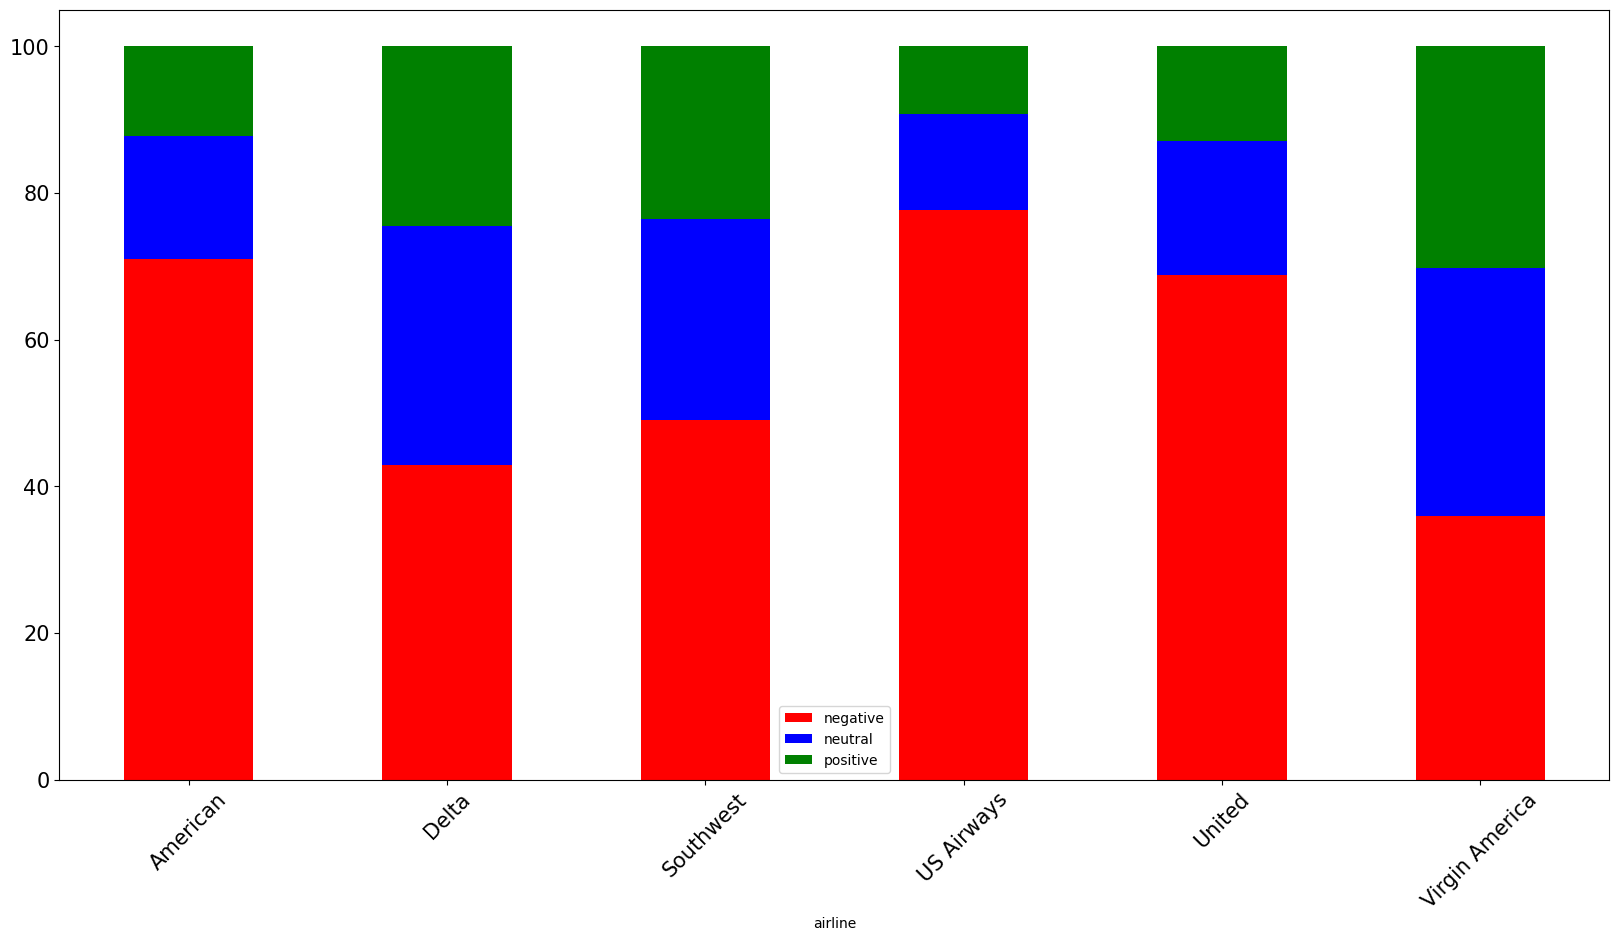

In [12]:
plt.rcParams['figure.figsize']=(20,10)
airline_normalized_df.plot.bar(stacked=True, color = {'negative': 'red', 'neutral': 'blue', 'positive': 'green'})
plt.legend(loc = 'best')
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.show();

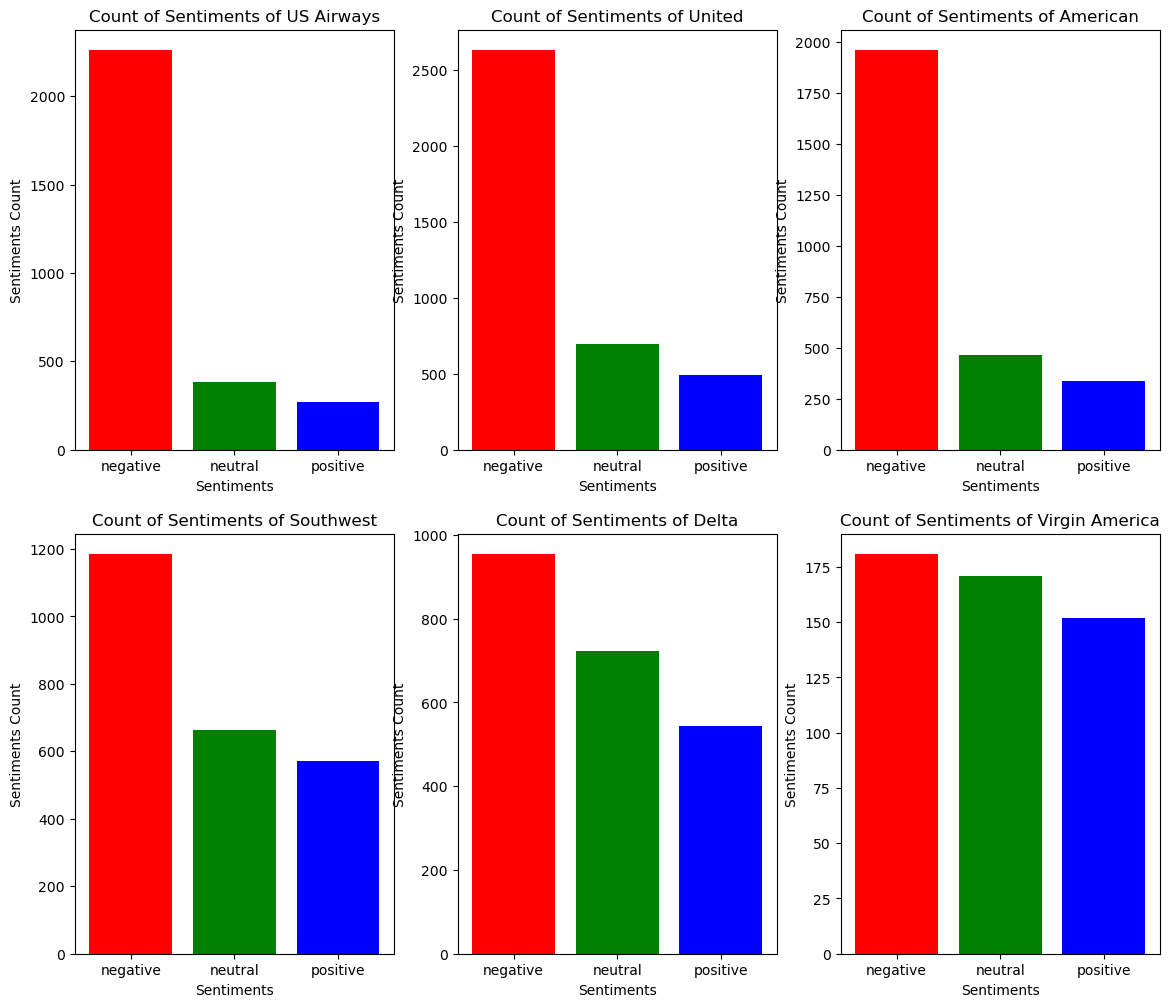

In [13]:
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(14, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=tweets_df[tweets_df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Sentiments Count')
    plt.xlabel('Sentiments')
    plt.title('Count of Sentiments of '+i)
    
plt.show();

1. **US Airways have a least positive sentiment followed by American and United.**
2. **Virgin America has most balanced sentiments**

## Basic Exploration in Text Mining

**Number of words - To create a temporary function lambda can be used. These functions do not require a name like a def function, however the output is**
1. **same as defining a permanent function**
2. **As these function are temporary, memory consumption is less in comparison to permanent function, Also there are multiple ways to get a similar output**

**Let's get a word count without writing a lambda function**

In [14]:
tweets_df['TotalWords'] = [len(x.split()) for x in tweets_df['text'].tolist()]
tweets_df[['text','TotalWords']].head()

,text,TotalWords
0,@VirginAmerica What @dhepburn said.,4
1,@VirginAmerica plus you've added commercials to the experience... tacky.,9
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,12
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",17
4,@VirginAmerica and it's a really big bad thing about it,10


In [15]:
tweets_df['WordCount'] = tweets_df['text'].apply(lambda x: len(x.split()))
tweets_df[['text','TotalWords','WordCount']].head()

,text,TotalWords,WordCount
0,@VirginAmerica What @dhepburn said.,4,4
1,@VirginAmerica plus you've added commercials to the experience... tacky.,9,9
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,12,12
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",17,17
4,@VirginAmerica and it's a really big bad thing about it,10,10


**Number of Characters- including spaces**

In [16]:
tweets_df['NumberOfCharacter']= tweets_df['text'].apply(lambda x: len(x))
tweets_df[['text','TotalWords','WordCount','NumberOfCharacter']].head()

,text,TotalWords,WordCount,NumberOfCharacter
0,@VirginAmerica What @dhepburn said.,4,4,35
1,@VirginAmerica plus you've added commercials to the experience... tacky.,9,9,72
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,12,12,71
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",17,17,126
4,@VirginAmerica and it's a really big bad thing about it,10,10,55


**Average Word Length:**

In [17]:
def average_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words))/len(words)

In [18]:
tweets_df['AverageWord_Length'] = tweets_df['text'].apply(lambda x: average_word(x))
tweets_df[['text','TotalWords','WordCount','NumberOfCharacter','AverageWord_Length']].head()

,text,TotalWords,WordCount,NumberOfCharacter,AverageWord_Length
0,@VirginAmerica What @dhepburn said.,4,4,35,8.00
1,@VirginAmerica plus you've added commercials to the experience... tacky.,9,9,72,7.11
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,12,12,71,5.00
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",17,17,126,6.47
4,@VirginAmerica and it's a really big bad thing about it,10,10,55,4.60


**No of Stopwords:**

In [19]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

tweets_df['No_of_Stopwords'] = tweets_df['text'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
tweets_df[['text','No_of_Stopwords']].head()

,text,No_of_Stopwords
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials to the experience... tacky.,3
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,2
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",6
4,@VirginAmerica and it's a really big bad thing about it,5


**No of Special Characters**

In [20]:
tweets_df['Hasgtags'] = tweets_df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
tweets_df[['text','Hasgtags']].head()

,text,Hasgtags
0,@VirginAmerica What @dhepburn said.,2
1,@VirginAmerica plus you've added commercials to the experience... tacky.,1
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,1
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",1
4,@VirginAmerica and it's a really big bad thing about it,1


**No of Numeric characters**

In [21]:
tweets_df['Numerics'] = tweets_df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
tweets_df[['text','Numerics']].head()

,text,Numerics
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials to the experience... tacky.,0
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,0
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0
4,@VirginAmerica and it's a really big bad thing about it,0


**No of Uppercase characters**

In [22]:
tweets_df['Upper_Character'] = tweets_df['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
tweets_df[['text','Upper_Character']].head()

,text,Upper_Character
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials to the experience... tacky.,0
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,2
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0
4,@VirginAmerica and it's a really big bad thing about it,0


## **Find the most frequently used words in negative tweets:**

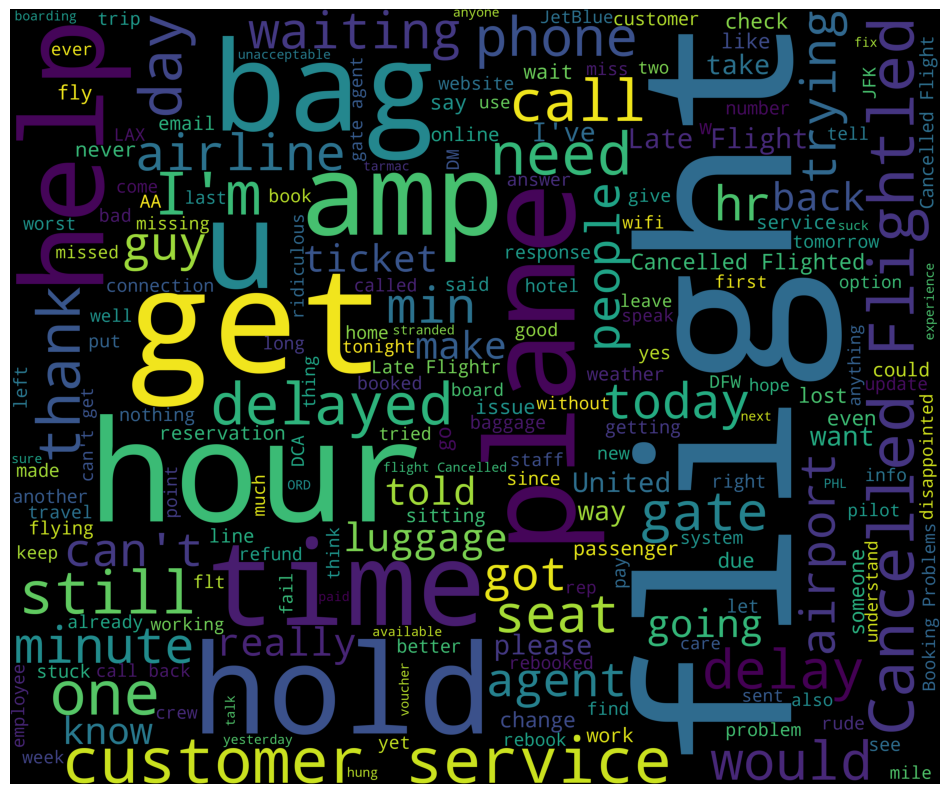

In [23]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stop_words = stopwords.words('english')
negative_tweets_df = tweets_df[tweets_df['airline_sentiment']=='negative']
negative_tweet_words = ' '.join(negative_tweets_df['text'])
cleaned_negative_tweets = ' '.join([word for word in negative_tweet_words.split() if 'http' not in word
                                   and not word.startswith('@')
                                   and word != 'RT'
                                   and not word.isdigit()])

negative_tweet_wordcloud = WordCloud(background_color='black',
                                     stopwords=stop_words,
                                     width=3000,
                                     height=2500).generate(cleaned_negative_tweets)

plt.figure(figsize=(12,12))
plt.imshow(negative_tweet_wordcloud)
plt.axis('off')
plt.show();

1. **In the above word cloud there are certain words probably will not make too much sense to study the reason for negative sentiment and subsequently based on the frequency of these words we will decide if the same needs to be deleted**
2. **Lets understand the reason for negativity for each airline:**

In [24]:
def get_negative_review_count(p_airline):
    if p_airline == 'All':
        a = tweets_df
    else:
        a = tweets_df[tweets_df['airline']==p_airline]
    
    negative_review_count = dict(a['negativereason'].value_counts(sort=False))
    unique_reasons = list(tweets_df['negativereason'].unique())
    unique_reasons = [ur for ur in unique_reasons if str(ur) != 'nan']
    unique_reason_df = pd.DataFrame(unique_reasons, columns=['Reasons'])
    unique_reason_df['Count'] = unique_reason_df['Reasons'].apply(lambda x: negative_review_count[x])
    
    return unique_reason_df

In [25]:
def plot_review_reasons(p_airline):
    reason_df = get_negative_review_count(p_airline)
    bar_color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange']
    plt.bar(reason_df['Reasons'], reason_df['Count'], color=bar_color)
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+p_airline)    

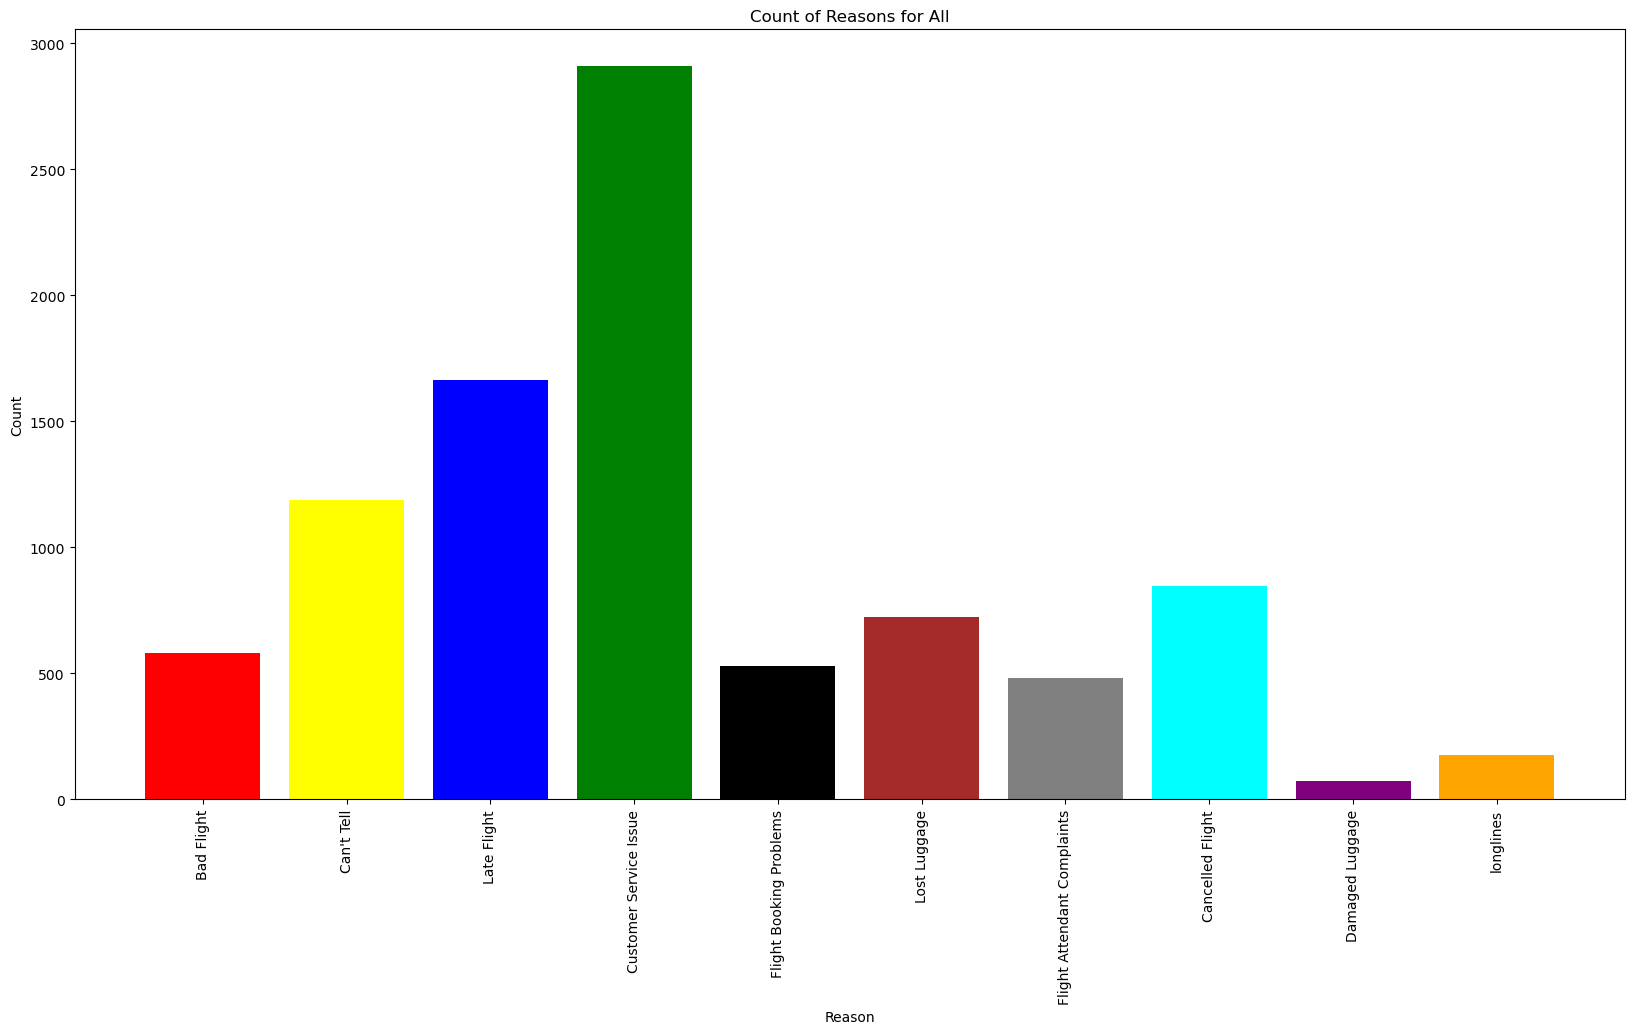

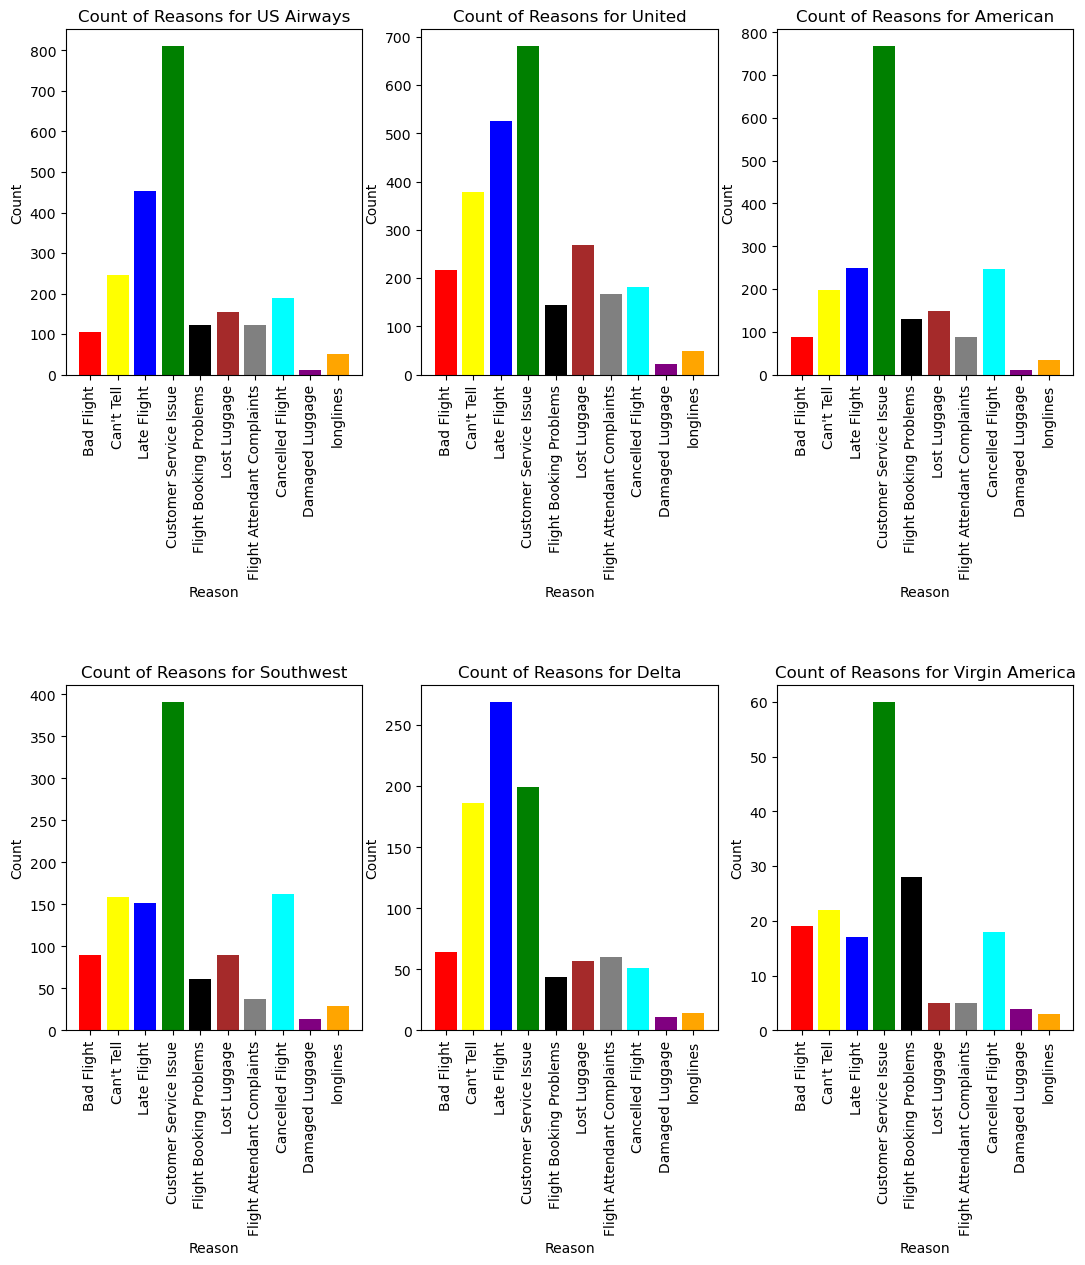

In [26]:
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plot_review_reasons('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_review_reasons(i)

plt.show();

1. **Customer Service Issue is the main negative reason for US Airways,United,American,Southwest,Virgin America**
2. **Late Flight is the main negative reason for Delta.**
3. **Interestingly, Virgin America has the least count of negative reasons (all less than 60)**
4. **Contrastingly to Virgin America, airlines like US Airways,United,American have more than 500 negative reasons (Late flight, Customer Service Issue)**

## **Find the most frequently used words in positive tweets:**

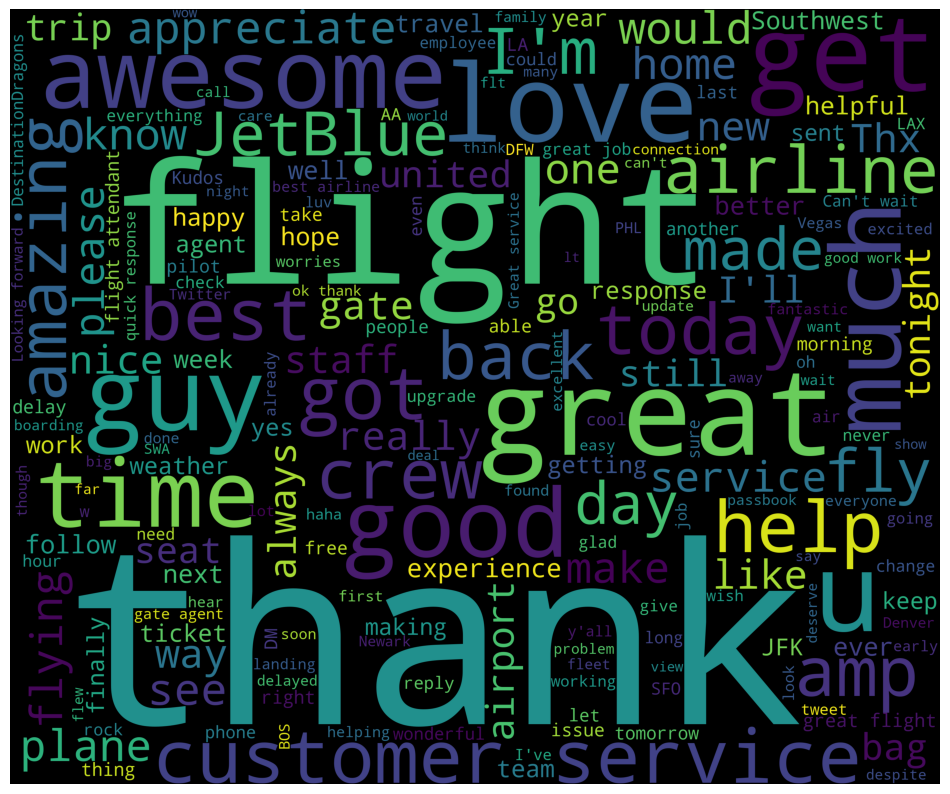

In [27]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stop_words = stopwords.words('english')
positive_tweets_df = tweets_df[tweets_df['airline_sentiment']=='positive']
positive_tweet_words = ' '.join(positive_tweets_df['text'])
cleaned_positive_tweets = ' '.join([word for word in positive_tweet_words.split() if 'http' not in word
                                   and not word.startswith('@')
                                   and word != 'RT'
                                   and not word.isdigit()])

positive_tweet_wordcloud = WordCloud(background_color='black',
                                     stopwords=stop_words,
                                     width=3000,
                                     height=2500).generate(cleaned_positive_tweets)

plt.figure(figsize=(12,12))
plt.imshow(positive_tweet_wordcloud)
plt.axis('off')
plt.show();

1. **In the above word cloud there are certain words that states the reason for positive sentiment and some words do not describe the positivity of the sentiments. We will decide if the same needs to be deleted**
2. **Lets understand the reason for positivity for each airline:**

## Data Pre-Processing

__Lower case conversion__

In [28]:
tweets_df['CleanedTweet'] = tweets_df['text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
tweets_df['CleanedTweet'].head()

0                                                                                               @virginamerica what @dhepburn said.
1                                                          @virginamerica plus you've added commercials to the experience... tacky.
2                                                           @virginamerica i didn't today... must mean i need to take another trip!
3    @virginamerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
4                                                                           @virginamerica and it's a really big bad thing about it
Name: CleanedTweet, dtype: object

__Punctuation Removal__

In [29]:
tweets_df['CleanedTweet'] = tweets_df['CleanedTweet'].str.replace('[^\w\s]','')
# tweets_df['CleanedTweet'] = tweets_df['CleanedTweet'].str.replace('[^a-z\s]','')
tweets_df['CleanedTweet'].head()

0                                                                                           virginamerica what dhepburn said
1                                                         virginamerica plus youve added commercials to the experience tacky
2                                                          virginamerica i didnt today must mean i need to take another trip
3    virginamerica its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4                                                                      virginamerica and its a really big bad thing about it
Name: CleanedTweet, dtype: object

In [30]:
tweets_df['CleanedTweet'] = tweets_df['CleanedTweet'].apply(lambda x: ''.join(x for x in x.strip() if 'http' not in x))
tweets_df['CleanedTweet'].head()

0                                                                                           virginamerica what dhepburn said
1                                                         virginamerica plus youve added commercials to the experience tacky
2                                                          virginamerica i didnt today must mean i need to take another trip
3    virginamerica its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4                                                                      virginamerica and its a really big bad thing about it
Name: CleanedTweet, dtype: object

__Removing Stopwords__

In [31]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

tweets_df['CleanedTweet'] = tweets_df['CleanedTweet'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))
tweets_df['CleanedTweet'].head()

0                                                                       virginamerica dhepburn said
1                                       virginamerica plus youve added commercials experience tacky
2                                        virginamerica didnt today must mean need take another trip
3    virginamerica really aggressive blast obnoxious entertainment guests faces amp little recourse
4                                                                virginamerica really big bad thing
Name: CleanedTweet, dtype: object

__Removing Digits__

In [32]:
tweets_df['CleanedTweet'] = tweets_df['CleanedTweet'].apply(lambda x: ' '.join(x for x in x.split() if not x.isdigit()))
tweets_df['CleanedTweet'].head()

0                                                                       virginamerica dhepburn said
1                                       virginamerica plus youve added commercials experience tacky
2                                        virginamerica didnt today must mean need take another trip
3    virginamerica really aggressive blast obnoxious entertainment guests faces amp little recourse
4                                                                virginamerica really big bad thing
Name: CleanedTweet, dtype: object

**Common Words Removal**
1. **We will create a list of 10 frequently occurring words and then decide if we need to remove it or retain it**
2. **Reason is that this file has tweets related to flights.. So no point in keeping the words like name, unless we have tweets related to different category**
3. **Name of the specific airline is not removed as we would require the name of the airline for bigram analysis**

In [33]:
most_frequent_words = pd.Series(' '.join(tweets_df['CleanedTweet']).split()).value_counts()[:30]
most_frequent_words

united           4143
flight           3873
usairways        3051
americanair      2957
southwestair     2452
jetblue          2361
get              1334
thanks           1072
cancelled        1056
service           956
help              855
time              770
im                764
customer          746
us                679
hours             669
flights           646
amp               638
hold              637
plane             618
thank             602
cant              578
still             568
please            560
one               558
need              553
would             548
delayed           529
virginamerica     521
back              518
dtype: int64

__Removing "flight" from list__

In [34]:
tweets_df['CleanedTweet']=tweets_df['CleanedTweet'].apply(lambda x: ' '.join(x for x in x.split() if x not in ['flight','flights']))
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,TotalWords,WordCount,NumberOfCharacter,AverageWord_Length,No_of_Stopwords,Hasgtags,Numerics,Upper_Character,CleanedTweet
0,570306133677760513,neutral,1.00,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),4,4,35,8.00,0,2,0,0,virginamerica dhepburn said
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials to the experience... tacky.,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),9,9,72,7.11,3,1,0,0,virginamerica plus youve added commercials experience tacky
2,570301083672813571,neutral,0.68,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),12,12,71,5.00,2,1,0,2,virginamerica didnt today must mean need take another trip
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,jnardino,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),17,17,126,6.47,6,1,0,0,virginamerica really aggressive blast obnoxious entertainment guests faces amp little recourse
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing about it,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),10,10,55,4.60,5,1,0,0,virginamerica really big bad thing


In [35]:
most_frequent_words = pd.Series(' '.join(tweets_df['CleanedTweet']).split()).value_counts()[:30]
most_frequent_words

united           4143
usairways        3051
americanair      2957
southwestair     2452
jetblue          2361
get              1334
thanks           1072
cancelled        1056
service           956
help              855
time              770
im                764
customer          746
us                679
hours             669
amp               638
hold              637
plane             618
thank             602
cant              578
still             568
please            560
one               558
need              553
would             548
delayed           529
virginamerica     521
back              518
gate              514
flightled         502
dtype: int64

**Rare Words Removal**
> **This is done as association of these less occurring words with the existing words could be a noise**


> **As it is difficult to make out if these words will have association in text analytics or not, hence to start with these words are kept in the dataset**

**Stemming -refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach**

In [36]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
tweets_df['CleanedTweet_stemmed'] = tweets_df['CleanedTweet'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))
tweets_df['CleanedTweet_stemmed'].head()

0                                                         virginamerica dhepburn said
1                                     virginamerica plu youv ad commerci experi tacki
2                            virginamerica didnt today must mean need take anoth trip
3    virginamerica realli aggress blast obnoxi entertain guest face amp littl recours
4                                                  virginamerica realli big bad thing
Name: CleanedTweet_stemmed, dtype: object

In [37]:
from nltk.stem import WordNetLemmatizer
wnltzr = WordNetLemmatizer()
tweets_df['CleanedTweet_stemmed'] = tweets_df['CleanedTweet'].apply(lambda x: ' '.join(wnltzr.lemmatize(word) for word in x.split()))
tweets_df['CleanedTweet_stemmed'].head()

0                                                                     virginamerica dhepburn said
1                                      virginamerica plus youve added commercial experience tacky
2                                      virginamerica didnt today must mean need take another trip
3    virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse
4                                                              virginamerica really big bad thing
Name: CleanedTweet_stemmed, dtype: object

**Let's look at the overall distribution of positive, negative and neutral sentiments**

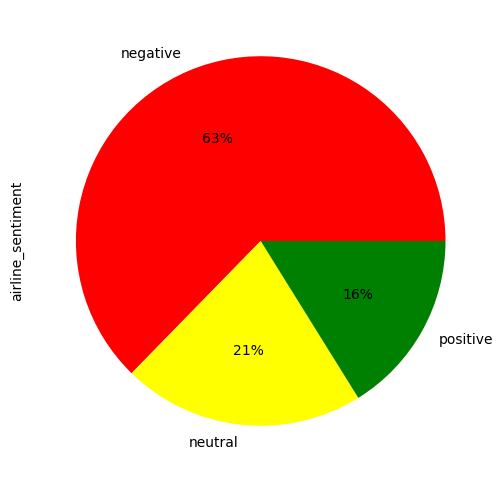

In [38]:
plt.figure(figsize=(6,6))
tweets_df['airline_sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['red','yellow','green'])
plt.show();

In [39]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
 12  TotalWords                    14640 non-null  int64  
 13  W

In [40]:
processed_features = tweets_df.iloc[:,20].values
processed_labels = tweets_df.iloc[:,1].values
processed_features
processed_labels

array(['virginamerica dhepburn said',
       'virginamerica plus youve added commercials experience tacky',
       'virginamerica didnt today must mean need take another trip', ...,
       'americanair please bring american airlines blackberry10',
       'americanair money change dont answer phones suggestions make commitment',
       'americanair ppl need know many seats next plz put us standby people next'],
      dtype=object)

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

__Feature Extraction using TF-IDF__

__TF-IDF__ is __Term Frequency - Inverse Document Frequency__

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=2500 , min_df=10, max_df=0.8)
processed_features = tfidf_vectorizer.fit_transform(processed_features).toarray()

__Splitting the Data into Train and Test__

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, processed_labels, test_size=0.25, random_state=1234)

In [43]:
print(f'X_train shape is {X_train.shape}')
print(f'X_test shape is {X_test.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_test shape is {y_test.shape}')

X_train shape is (10980, 1723)
X_test shape is (3660, 1723)
y_train shape is (10980,)
y_test shape is (3660,)


## __Random Forest Modelling__

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
y_train_rf_predicted = RF_model.predict(X_train)
print(f'Score -{metrics.accuracy_score(y_train, y_train_rf_predicted)}')
print(f'Classification Report -\n{metrics.classification_report(y_train, y_train_rf_predicted)}')
print(f'Confusion Matrix -\n{metrics.confusion_matrix(y_train, y_train_rf_predicted)}')

RandomForestClassifier()

Score -0.992167577413479
Classification Report -
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      6873
     neutral       0.98      0.99      0.98      2352
    positive       0.98      0.99      0.98      1755

    accuracy                           0.99     10980
   macro avg       0.99      0.99      0.99     10980
weighted avg       0.99      0.99      0.99     10980

Confusion Matrix -
[[6841   28    4]
 [   1 2322   29]
 [   1   23 1731]]


In [46]:
y_test_rf_predicted = RF_model.predict(X_test)
print(f'Score -{metrics.accuracy_score(y_test, y_test_rf_predicted)}')
print(f'Classification Report -\n{metrics.classification_report(y_test, y_test_rf_predicted)}')
print(f'Confusion Matrix -\n{metrics.confusion_matrix(y_test, y_test_rf_predicted)}')

Score -0.7579234972677595
Classification Report -
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      2305
     neutral       0.58      0.43      0.50       747
    positive       0.79      0.54      0.64       608

    accuracy                           0.76      3660
   macro avg       0.72      0.63      0.66      3660
weighted avg       0.75      0.76      0.74      3660

Confusion Matrix -
[[2121  135   49]
 [ 382  324   41]
 [ 179  100  329]]


#### Since the Sentiment is imbalanced, and finding actual sentiment of the passennger is important,the metric to watch out for in this case can be F1 score which is nothing but the harmonic mean between precision and recall.
#### Precision and Recall are complementary metrics that have an inverse relationship. If both are of interest to us then we use the F1 score to combine precision and recall into a single metric.

## __Decision Tree Model__

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=1234)
dt_model.fit(X_train, y_train)
y_train_dt_predicted = dt_model.predict(X_train)
print(f'Score - {metrics.accuracy_score(y_train, y_train_dt_predicted)}')
print(f'Classification Report -\n {metrics.classification_report(y_train, y_train_dt_predicted)}')
print(f'Confusion Matrix -\n {metrics.confusion_matrix(y_train, y_train_dt_predicted)}')

DecisionTreeClassifier(random_state=1234)

Score - 0.992167577413479
Classification Report -
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00      6873
     neutral       0.98      0.99      0.98      2352
    positive       0.99      0.98      0.98      1755

    accuracy                           0.99     10980
   macro avg       0.99      0.99      0.99     10980
weighted avg       0.99      0.99      0.99     10980

Confusion Matrix -
 [[6846   27    0]
 [   3 2326   23]
 [   5   28 1722]]


In [48]:
y_test_dt_predicted = dt_model.predict(X_test)
print(f'Score -{metrics.accuracy_score(y_test, y_test_dt_predicted)}')
print(f'Classification Report -\n{metrics.classification_report(y_test, y_test_dt_predicted)}')
print(f'Confusion Matrix -\n{metrics.confusion_matrix(y_test, y_test_dt_predicted)}')

Score -0.6786885245901639
Classification Report -
              precision    recall  f1-score   support

    negative       0.78      0.79      0.79      2305
     neutral       0.42      0.46      0.44       747
    positive       0.61      0.51      0.56       608

    accuracy                           0.68      3660
   macro avg       0.60      0.59      0.59      3660
weighted avg       0.68      0.68      0.68      3660

Confusion Matrix -
[[1832  349  124]
 [ 330  342   75]
 [ 182  116  310]]


## Linear Discriminant Analysis

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

y_train_lda_predicted = lda_model.predict(X_train)
print(f'Score - {metrics.accuracy_score(y_train, y_train_lda_predicted)}')
print(f'Classification Report -\n {metrics.classification_report(y_train, y_train_lda_predicted)}')
print(f'Confusion Matrix -\n {metrics.confusion_matrix(y_train, y_train_lda_predicted)}')

LinearDiscriminantAnalysis()

Score - 0.855191256830601
Classification Report -
               precision    recall  f1-score   support

    negative       0.89      0.93      0.91      6873
     neutral       0.75      0.70      0.72      2352
    positive       0.85      0.77      0.81      1755

    accuracy                           0.86     10980
   macro avg       0.83      0.80      0.81     10980
weighted avg       0.85      0.86      0.85     10980

Confusion Matrix -
 [[6392  380  101]
 [ 562 1644  146]
 [ 226  175 1354]]


In [50]:
y_test_lda_predicted = lda_model.predict(X_test)
print(f'Score - {metrics.accuracy_score(y_test, y_test_lda_predicted)}')
print(f'Classification Report -\n {metrics.classification_report(y_test, y_test_lda_predicted)}')
print(f'Confusion Matrix -\n {metrics.confusion_matrix(y_test, y_test_lda_predicted)}')

Score - 0.769672131147541
Classification Report -
               precision    recall  f1-score   support

    negative       0.84      0.87      0.85      2305
     neutral       0.58      0.60      0.59       747
    positive       0.75      0.61      0.68       608

    accuracy                           0.77      3660
   macro avg       0.72      0.69      0.70      3660
weighted avg       0.77      0.77      0.77      3660

Confusion Matrix -
 [[1998  234   73]
 [ 251  447   49]
 [ 141   95  372]]


**Out of the 3 models given above- Random Forest, Decision Tree and Linear Discriminant Analysis, the difference between train and test dataset performance parameters is very high for Random Forest and Decision Tree. So, LDA has performed the best.**

## Let's Recreate model with only 2 classes where positive and neutral tweets are merged and treated as non-negative

In [51]:
def make_binary_classification(text):
    if text == "positive":
        return "non-negative"
    elif text == "neutral":
        return "non-negative"
    else:
        return "negative"

In [52]:
tweets_df['Modified_airline_sentiments'] = tweets_df['airline_sentiment'].apply(make_binary_classification)
tweets_df['Modified_airline_sentiments'].head(10)

0    non-negative
1    non-negative
2    non-negative
3        negative
4        negative
5        negative
6    non-negative
7    non-negative
8    non-negative
9    non-negative
Name: Modified_airline_sentiments, dtype: object

In [53]:
tweets_df['Modified_airline_sentiments'].value_counts()

negative        9178
non-negative    5462
Name: Modified_airline_sentiments, dtype: int64

In [54]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
 12  TotalWords                    14640 non-null  int64  
 13  W

In [55]:
tweets_df['Modified_airline_sentiments'].unique()

array(['non-negative', 'negative'], dtype=object)

In [56]:
processed_features = tweets_df.iloc[:,21].values
processed_labels = tweets_df.iloc[:,22].values
processed_features
processed_labels

array(['virginamerica dhepburn said',
       'virginamerica plus youve added commercial experience tacky',
       'virginamerica didnt today must mean need take another trip', ...,
       'americanair please bring american airline blackberry10',
       'americanair money change dont answer phone suggestion make commitment',
       'americanair ppl need know many seat next plz put u standby people next'],
      dtype=object)

array(['non-negative', 'non-negative', 'non-negative', ...,
       'non-negative', 'negative', 'non-negative'], dtype=object)

__Feature Extraction using TF-IDF__

__TF-IDF__ is __Term Frequency - Inverse Document Frequency__

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=2500 , min_df=10, max_df=0.8)
processed_features = tfidf_vectorizer.fit_transform(processed_features).toarray()

__Splitting the Data into Train and Test__

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, processed_labels, test_size=0.25, random_state=1234)

In [59]:
print(f'X_train shape is {X_train.shape}')
print(f'X_test shape is {X_test.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_test shape is {y_test.shape}')

X_train shape is (10980, 1656)
X_test shape is (3660, 1656)
y_train shape is (10980,)
y_test shape is (3660,)


## __Random Forest Modelling__ for Binary Classification

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
y_train_rf_predicted = RF_model.predict(X_train)
print(f'Score -{metrics.accuracy_score(y_train, y_train_rf_predicted)}')
print(f'Classification Report -\n{metrics.classification_report(y_train, y_train_rf_predicted)}')
print(f'Confusion Matrix -\n{metrics.confusion_matrix(y_train, y_train_rf_predicted)}')

RandomForestClassifier()

Score -0.9971766848816029
Classification Report -
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      6873
non-negative       0.99      1.00      1.00      4107

    accuracy                           1.00     10980
   macro avg       1.00      1.00      1.00     10980
weighted avg       1.00      1.00      1.00     10980

Confusion Matrix -
[[6845   28]
 [   3 4104]]


In [61]:
y_test_rf_predicted = RF_model.predict(X_test)
print(f'Score -{metrics.accuracy_score(y_test, y_test_rf_predicted)}')
print(f'Classification Report -\n{metrics.classification_report(y_test, y_test_rf_predicted)}')
print(f'Confusion Matrix -\n{metrics.confusion_matrix(y_test, y_test_rf_predicted)}')

Score -0.8073770491803278
Classification Report -
              precision    recall  f1-score   support

    negative       0.81      0.90      0.85      2305
non-negative       0.79      0.65      0.71      1355

    accuracy                           0.81      3660
   macro avg       0.80      0.78      0.78      3660
weighted avg       0.81      0.81      0.80      3660

Confusion Matrix -
[[2073  232]
 [ 473  882]]


#### We will consider Recall as model evaluation metric to measure the performance of the model. As it can help the airline to target customers who have a negative opinion on the airlines to convert them into non negative. As the main goal here will be to reduce the type-2 error in our model. 
#### for e.g. Consider a passenger who has given a negative feedback but out model predicted non-negative, This can be unacceptable.

**Results are better than 3 levels random forest classification, however difference between train and test score is still large.
Let's see if hyperparamter tuning can improve the result**

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7],
    'max_features': [8],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [63]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7], 'max_features': [8],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100]})

In [64]:
grid_search.best_params_
grid_search.best_estimator_

{'max_depth': 7,
 'max_features': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 100}

RandomForestClassifier(max_depth=7, max_features=8, min_samples_leaf=5,
                       min_samples_split=50)

In [65]:
## Performance Matrix on train data set
y_train_gs_rf_predict = grid_search.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_gs_rf_predict))
print(metrics.confusion_matrix(y_train, y_train_gs_rf_predict))
print(metrics.classification_report(y_train, y_train_gs_rf_predict))

0.6259562841530054
[[6873    0]
 [4107    0]]
              precision    recall  f1-score   support

    negative       0.63      1.00      0.77      6873
non-negative       0.00      0.00      0.00      4107

    accuracy                           0.63     10980
   macro avg       0.31      0.50      0.38     10980
weighted avg       0.39      0.63      0.48     10980



In [66]:
## Performance Matrix on test data set
y_test_gs_rf_predict = grid_search.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_gs_rf_predict))
print(metrics.confusion_matrix(y_test, y_test_gs_rf_predict))
print(metrics.classification_report(y_test, y_test_gs_rf_predict))

0.6297814207650273
[[2305    0]
 [1355    0]]
              precision    recall  f1-score   support

    negative       0.63      1.00      0.77      2305
non-negative       0.00      0.00      0.00      1355

    accuracy                           0.63      3660
   macro avg       0.31      0.50      0.39      3660
weighted avg       0.40      0.63      0.49      3660



## __Decision Tree Model__ for Binary Classification

In [67]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=1234)
dt_model.fit(X_train, y_train)
y_train_dt_predicted = dt_model.predict(X_train)
print(f'Score - {metrics.accuracy_score(y_train, y_train_dt_predicted)}')
print(f'Classification Report -\n {metrics.classification_report(y_train, y_train_dt_predicted)}')
print(f'Confusion Matrix -\n {metrics.confusion_matrix(y_train, y_train_dt_predicted)}')

DecisionTreeClassifier(random_state=1234)

Score - 0.9971766848816029
Classification Report -
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00      6873
non-negative       0.99      1.00      1.00      4107

    accuracy                           1.00     10980
   macro avg       1.00      1.00      1.00     10980
weighted avg       1.00      1.00      1.00     10980

Confusion Matrix -
 [[6847   26]
 [   5 4102]]


In [68]:
y_test_dt_predicted = dt_model.predict(X_test)
print(f'Score -{metrics.accuracy_score(y_test, y_test_dt_predicted)}')
print(f'Classification Report -\n{metrics.classification_report(y_test, y_test_dt_predicted)}')
print(f'Confusion Matrix -\n{metrics.confusion_matrix(y_test, y_test_dt_predicted)}')

Score -0.7300546448087432
Classification Report -
              precision    recall  f1-score   support

    negative       0.79      0.78      0.79      2305
non-negative       0.63      0.64      0.64      1355

    accuracy                           0.73      3660
   macro avg       0.71      0.71      0.71      3660
weighted avg       0.73      0.73      0.73      3660

Confusion Matrix -
[[1808  497]
 [ 491  864]]


**Random Forest and Decision Tree results were better than the 3 level prediction. But we still see the issue that training and test data is more than 10%**

### Regularized Decision Tree

In [69]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 8,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, y_train)

y_train_reg_dt_predicted = reg_dt_model.predict(X_train)
print(f'Score - {metrics.accuracy_score(y_train, y_train_reg_dt_predicted)}')
print(f'Classification Report -\n {metrics.classification_report(y_train, y_train_reg_dt_predicted)}')
print(f'Confusion Matrix -\n {metrics.confusion_matrix(y_train, y_train_reg_dt_predicted)}')

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=30)

Score - 0.7512750455373406
Classification Report -
               precision    recall  f1-score   support

    negative       0.76      0.87      0.81      6873
non-negative       0.72      0.55      0.62      4107

    accuracy                           0.75     10980
   macro avg       0.74      0.71      0.72     10980
weighted avg       0.75      0.75      0.74     10980

Confusion Matrix -
 [[6007  866]
 [1865 2242]]


In [70]:
y_test_dt_predicted = dt_model.predict(X_test)
print(f'Score -{metrics.accuracy_score(y_test, y_test_dt_predicted)}')
print(f'Classification Report -\n{metrics.classification_report(y_test, y_test_dt_predicted)}')
print(f'Confusion Matrix -\n{metrics.confusion_matrix(y_test, y_test_dt_predicted)}')

Score -0.7300546448087432
Classification Report -
              precision    recall  f1-score   support

    negative       0.79      0.78      0.79      2305
non-negative       0.63      0.64      0.64      1355

    accuracy                           0.73      3660
   macro avg       0.71      0.71      0.71      3660
weighted avg       0.73      0.73      0.73      3660

Confusion Matrix -
[[1808  497]
 [ 491  864]]


**On a Regularized Tree, Non-Negative recall is not good, hence for comparison we will consider the model which was built without regularization**

## Linear Discriminant Analysis for Binary Classification

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

y_train_lda_predicted = lda_model.predict(X_train)
print(f'Score - {metrics.accuracy_score(y_train, y_train_lda_predicted)}')
print(f'Classification Report -\n {metrics.classification_report(y_train, y_train_lda_predicted)}')
print(f'Confusion Matrix -\n {metrics.confusion_matrix(y_train, y_train_lda_predicted)}')

LinearDiscriminantAnalysis()

Score - 0.8836976320582878
Classification Report -
               precision    recall  f1-score   support

    negative       0.89      0.92      0.91      6873
non-negative       0.86      0.82      0.84      4107

    accuracy                           0.88     10980
   macro avg       0.88      0.87      0.87     10980
weighted avg       0.88      0.88      0.88     10980

Confusion Matrix -
 [[6348  525]
 [ 752 3355]]


In [72]:
y_test_lda_predicted = lda_model.predict(X_test)
print(f'Score - {metrics.accuracy_score(y_test, y_test_lda_predicted)}')
print(f'Classification Report -\n {metrics.classification_report(y_test, y_test_lda_predicted)}')
print(f'Confusion Matrix -\n {metrics.confusion_matrix(y_test, y_test_lda_predicted)}')

Score - 0.8112021857923497
Classification Report -
               precision    recall  f1-score   support

    negative       0.84      0.87      0.85      2305
non-negative       0.76      0.72      0.74      1355

    accuracy                           0.81      3660
   macro avg       0.80      0.79      0.79      3660
weighted avg       0.81      0.81      0.81      3660

Confusion Matrix -
 [[2000  305]
 [ 386  969]]


1. **Linear Discriminant model has performed the best even without any hyperparameter tuning for both the classes**
2. **Test and Train performance is within the accepted limited of +/- 10%**

Out of the 3 models given above, considering the difference between train and test dataset performance parameters, LDA has performed the best.(for 2 classes and binary classification)

In terms of sentiments, based on the organisation objective, either positive, negative or neutral metrics could be analysed to define the marketing strategy e.g. based on negative sentiments key words organisation can decide on what they should concertrate for improvement.

**One important observation**

> **Its not necessary that parameter tuning will always result in a better model. As we have observed in Random Forest when Grid Search was used there was no improvement in the recall value of both the classes.and in case of Decision Tree, recall for non-negative has gone down , post regularization. Sometimes, hyper parameter tuning might result in overfitting of models also.**